### 선형회귀
- 회귀의 개념, 대표적인 회귀 알고리즘
- 직선을 통해서 해당 데이터의 특징을 가장 잘 나타내는 식을 도출
- 일차방정식의 회귀식 만들어진다

- 회귀는 독립변수 종속변수 상관관계를 모델링
- 독립변수는 여러 개 가능, 종속변수는 한 개를 통해 진행
- 선형회귀의 목적에 따라 사용할 수 있다.

- 연봉과 일의 업무시간의 관계를 알고 싶은 경우 -> 독립변수와 종속변수 관계, 변화 이해 필요
- 회귀분석을 통해서 밝혀낸다
- 회귀분석에 제공하는 다양한 값을 R^2 등의 값들을 이해하고 해석할 수 있다.

# 예측을 위해 사용
- 회귀분석을 통해 머신러닝의 개념으로 값을 예측
- 회귀식에 특정 값을 넣어서 예측하는 방식
- 일을 더 많이 하면 연봉이 더 올라갈 것이다.

# 인과관계 증명
 - 인과관계 측정을 위해 회귀 활용
 - 다른 요인 통제, 알고 싶은 요인만 분석 진행
 
 - 선형적이지 않으면 비선형회귀로 접근 
 
 - 다항회귀? 차수를 늘려서 회귀식 도출
 
 ### 가장 대표적인 선형회귀를 배울 것
 

In [1]:
import sklearn 
import pandas as  pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets

In [2]:
calhouse=sklearn.datasets.fetch_california_housing()
dfx=pd.DataFrame(calhouse.data, columns=calhouse.feature_names)
dfy=pd.DataFrame(calhouse.target, columns=['y'])
df=pd.concat([dfx, dfy], axis=1)

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df_spl=df[['MedInc', 'y']]

In [5]:
model1=sm.OLS.from_formula('y~MedInc',df_spl)
resl=model1.fit()

In [6]:
resl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        15:25:11   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4509      0.013     34.082      0.000       0.425       0.477
MedInc         0.4179      0.003    136.223      0.000       0.412       0.424
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1. 
- R-squared : 결정계수, 회귀모델이 얼마나 설명력이 있는가. 회귀의 설명력을 나타낼 때 많이 이야기하고 1이면 가장 좋음
- Adj. R-squared : 조정된 결정계수, 독립변수가 여러개 있을 때 가장 데이터 조정하여 나온 값
- F-statistic: F통계량, 도출된 회귀식이 적절한지 확인. 0과 가까우면 적절
- Prob (F-statistic) : 유의한지 판단하는 0.05 이하면 변수끼리 관련있음을 판단
- AIC : 모델을 평가하는 지표, 낮을수록 좋다
- BIC : 모델 평가하는데 패널티 부여, 낮으면 좋다

## 2.
- coef : 회귀계수값
- std err : 계수 추정치에 대한 표준오차. 작을수록 좋음
- t.test 독립변수, 종속변수 사이의 관계 확인
- p>|t| : 독립변수가 유의한지 보는 확률. 0.05보다 작아야 유의함

## 3.
- Omnibus : 비대칭, 첨도 등을 결합해서 정규성 테스트. 값이 크면 정규분포에 가까움
- Prob(Omnibus) : 유의확률 0.05 이하일 경우 유의하다 판단
- skew 왜도 치우쳐있는지
- kurtosis 첨도 뾰족한지
- Durbin-Watson: 잔차 독립성 여부 판단. 1.5~2.5 사이일 때 잔차 독립적 0이나 4는 잔차들이 자기상관이 있다.
- Jarque-Bera (JB): 자크베라 정규성 검정. 값이 클수록 정규분포의 데이터 사용
- Cond. No: 다중공선성. 독립변수간의 상관관계. 10 이상이면 다중공선성 있다고 판단

### 데이터 전체를 가지고 넣기

In [7]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
model2 = sm.OLS.from_formula('y~'+'+'.join(calhouse.feature_names),data=df)
res2 = model2.fit()

In [10]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        15:26:07   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 변수와 종속변수 관계 확인

In [11]:
import matplotlib.pyplot as plt

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


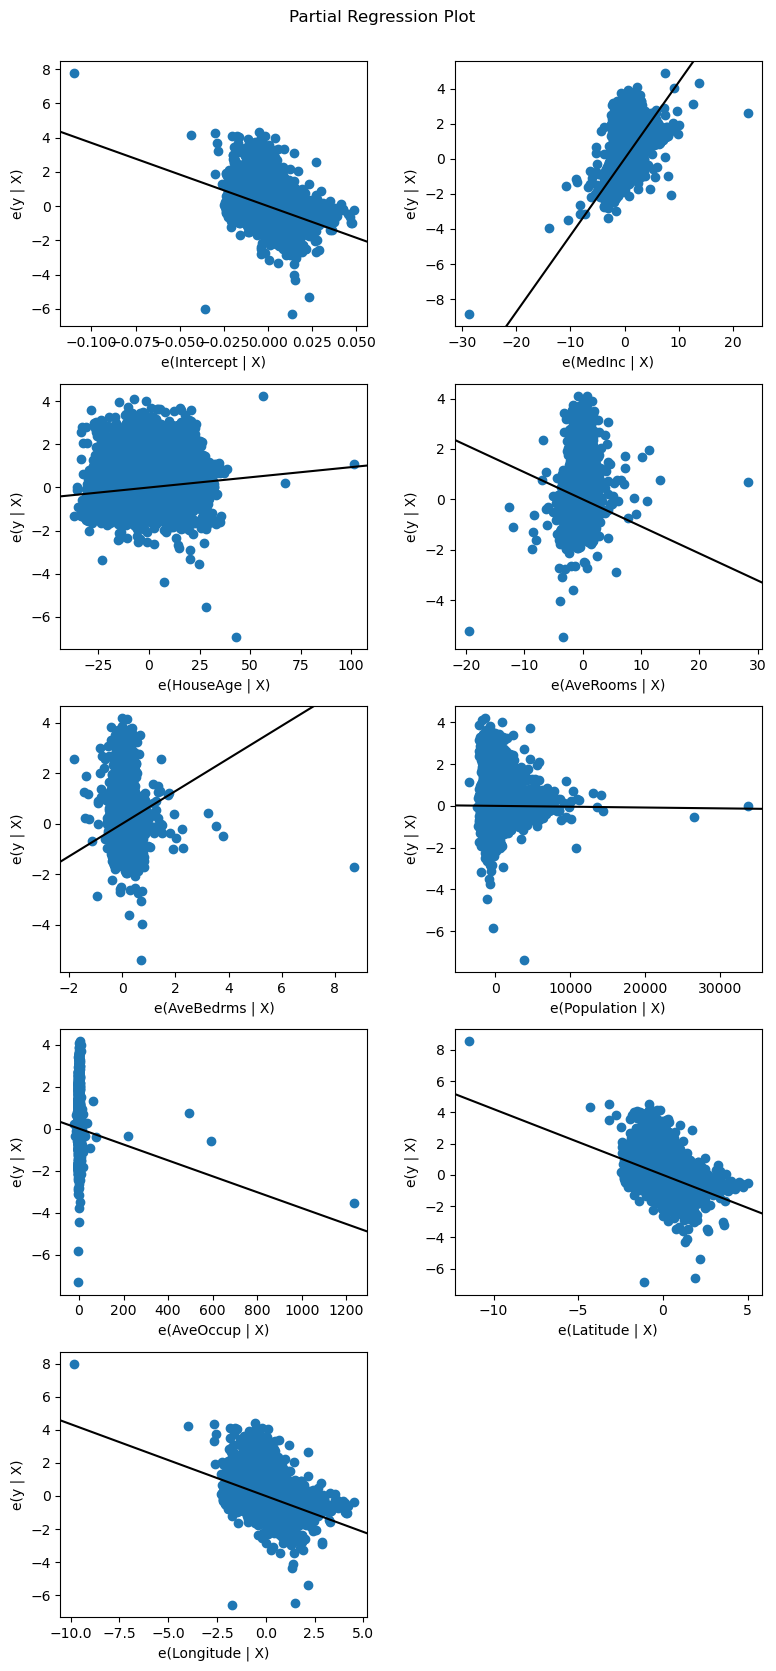

In [12]:
fig=plt.figure(figsize=(8,17))
sm.graphics.plot_partregress_grid(res2, fig=fig)
plt.show()

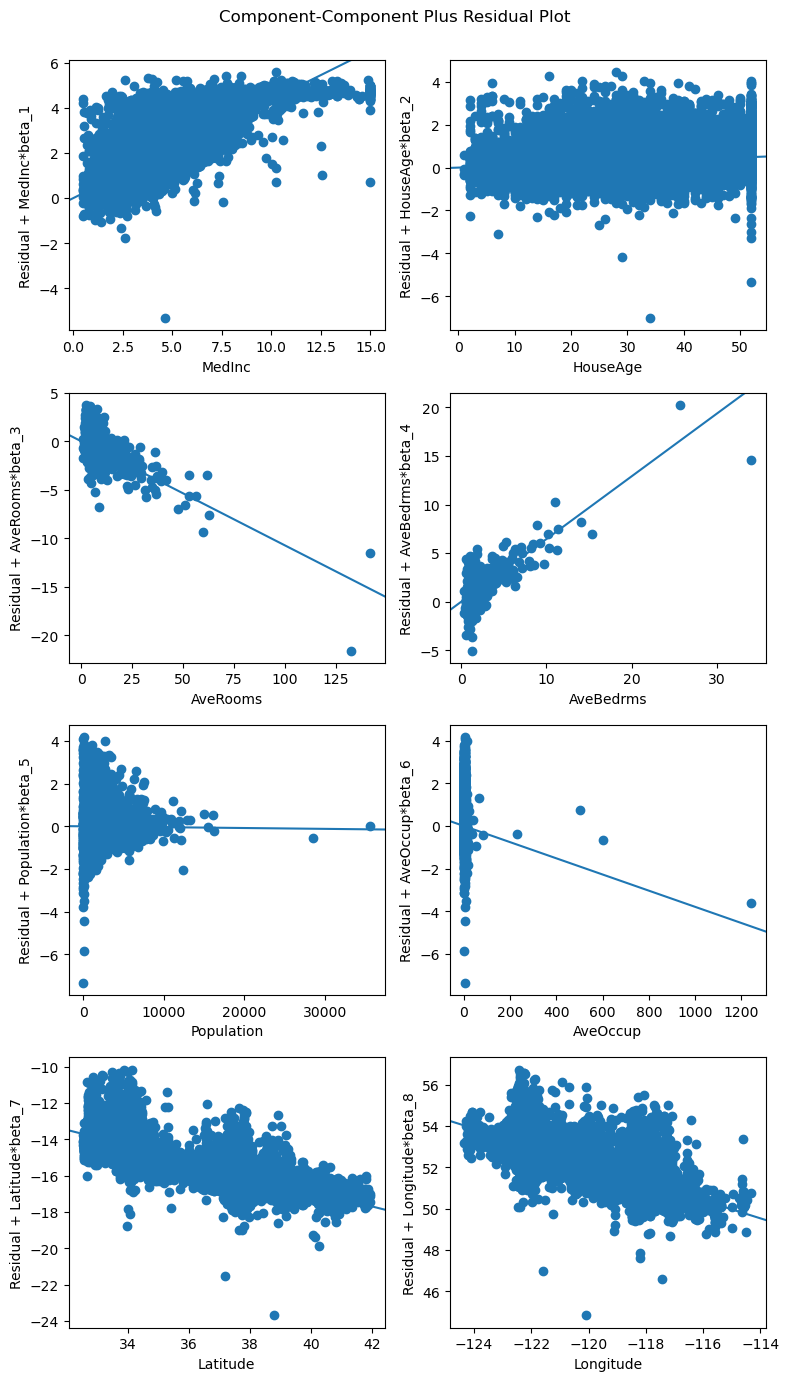

In [15]:
# CCPR Plot 개별 변수의 추정 회귀계수를 표현하는 Plot
# sm에서 제공

fig = plt.figure(figsize=(8,17))
sm.graphics.plot_ccpr_grid(res2, fig=fig)
plt.savefig('CCPR.png',transparent=False, facecolor='white')